# EKS

# Create VPC

Create VPC with 2 availability zones, 2 public subnets, and 2 private subnets.

Adding a public subnet creates an internet gateway in the public subnet.

A NAT gateway is a Network Address Translation (NAT) service. NAT gateways enable resources in private subnets to reach the internet. External services, however, cannot initiate a connection with the resources in the private subnets.

vpc-0454ea04dd6988332

Set "Enable auto-assign public IPv4 address" to True in both public subnets.

# Create IAM Roles

1. Create role with custom trust policy:
```
{
	"Version": "2012-10-17",
	"Statement": [
		{
			"Sid": "Statement1",
			"Effect": "Allow",
			"Principal": {
            	"Service": "eks.amazonaws.com"
            },
			"Action": "sts:AssumeRole"
		}
	]
}
```
and with two permission policies: AmazonEKSClusterPolicy, AmazonEKSServicePolicy.

2. The second role is standard EC2 role with permission policies: AmazonEKSWorkerNodePolicy, AmazonEKS_CNI_Policy, AmazonEC2ContainerRegistryReadOnly

```
{
    "Version": "2012-10-17",
    "Statement": [
        {
            "Effect": "Allow",
            "Action": [
                "sts:AssumeRole"
            ],
            "Principal": {
                "Service": [
                    "ec2.amazonaws.com"
                ]
            }
        }
    ]
}
```

# Create EKS cluster

Amazon Elastic Kubernetes Service is a managed service that lets you use Kubernetes without involving with the root-level tasks of the kubernetes. 

First create EKS cluster, then create node group (under Compute/Node groups).



# Install Load Balancer Controller

```bash
aws eks update-kubeconfig --region us-east-1 --name educative-eks-cluster
kubectl get svc
eksctl version
```

Note: to install `eksctl`:
```bash
ARCH=amd64
PLATFORM=$(uname -s)_$ARCH
curl -sLO "https://github.com/weaveworks/eksctl/releases/latest/download/eksctl_$PLATFORM.tar.gz"
tar -xzf eksctl_$PLATFORM.tar.gz -C /tmp && rm eksctl_$PLATFORM.tar.gz
sudo mv /tmp/eksctl /usr/local/bin
```




# Create IAM OpenID Connect (OIDC) identity provider

OpenID Connect identity provider is required to deploy a Load Balancer Controller to the EKS cluster. When we created a cluster, EKS created an OIDC provider URL for us.

OpenID Connect ID: https://oidc.eks.us-east-1.amazonaws.com/id/A48CD07D2244138E306A64377B921597

We need to create Identity Provider, and assign OpenID to it. Also for the "Audience" assign `sts.amazonaws.com`. `sts` is Security Token Service.

# Create a policy and IAM role for the Load Balancer Controller

```
aws sts get-caller-identity
```

Create `AmazonEKSLoadBalancerControllerRole`, replace account-ID with AWS account ID:
```
eksctl create iamserviceaccount \
  --cluster=educative-eks-cluster \
  --namespace=kube-system \
  --name=aws-load-balancer-controller \
  --role-name AmazonEKSLoadBalancerControllerRole \
  --attach-policy-arn=arn:aws:iam::051101033101:policy/AWSLoadBalancerControllerIAMPolicy --approve
  ```

# Install Load Balancer Controller using helm

```zsh
curl https://raw.githubusercontent.com/helm/helm/master/scripts/get-helm-3 > get_helm.sh
chmod 700 get_helm.sh
./get_helm.sh
```


```
helm version --short | cut -d + -f 1
```

In [3]:
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB

with Diagram("Grouped Workers", show=False, direction="TB"):
    ELB("lb") >> [EC2("worker1"),
                  EC2("worker2"),
                  EC2("worker3"),
                  EC2("worker4"),
                  EC2("worker5")] >> RDS("events")

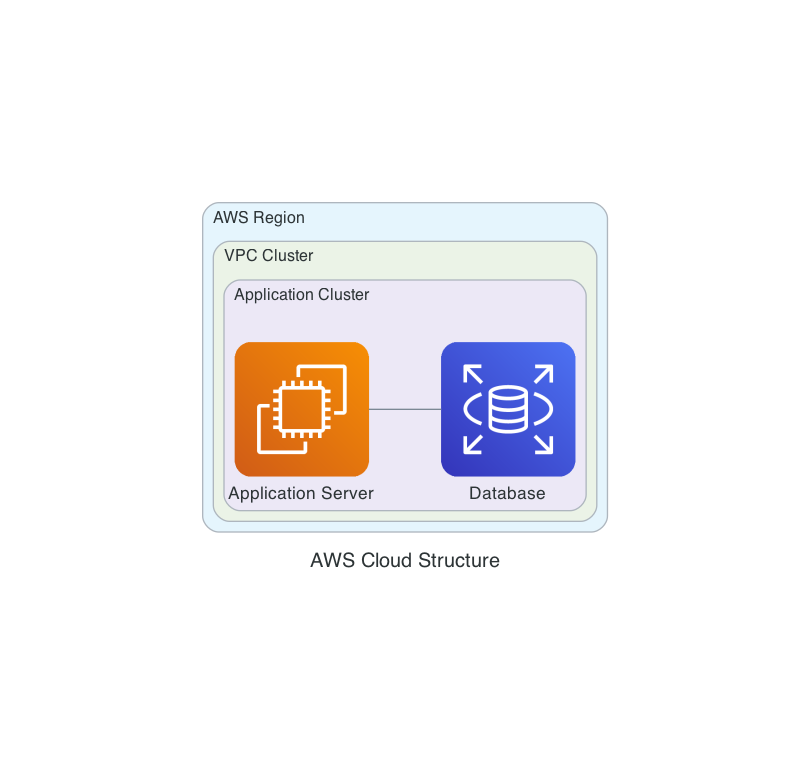

In [1]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import VPC

with Diagram("AWS Cloud Structure", show=False) as diag:
    with Cluster("AWS Region"):
        with Cluster("VPC Cluster"):
            with Cluster("Application Cluster"):
                ec2_instance = EC2("Application Server")
                database = RDS("Database")

            ec2_instance - database  # Demonstrates a connection within the Application Cluster

# This will save the diagram as 'aws_cloud_structure.png' in the current directory.
diag
